In [1]:
from gaia_download import get_sources_by_random_index

In [3]:
sources = get_sources_by_random_index(start_index=1000)
sources.head()

,source_id,ra,dec,parallax,parallax_error,pmra,pmra_error,pmdec,pmdec_error
0,1846165132110522496,315.573464,28.821774,-0.035718,0.258022,-3.358419,0.230772,-3.638325,0.250024
1,4117766192454139136,262.669872,-21.802989,NaN,NaN,NaN,NaN,NaN,NaN
2,4064421015002065280,270.311275,-25.195034,NaN,NaN,NaN,NaN,NaN,NaN
3,2225828455686043264,346.270569,70.357978,0.155591,0.082792,-3.484440,0.091961,-0.821103,0.086819
4,5410015508420486144,143.434324,-48.747868,0.130303,0.036939,-3.811446,0.040957,3.690097,0.037938


In [7]:
sources_astrometry = sources[['ra', 'dec', 'parallax', 'pmra', 'pmdec']]

In [9]:
sources_astrometry = sources_astrometry.dropna()

In [25]:
from sklearn.cluster import DBSCAN
from sklearn import metrics

In [39]:
print(len(sources_astrometry))

815


In [115]:
af = DBSCAN(eps=4., min_samples=2).fit(sources_astrometry)

In [116]:
labels = af.labels_
print(len(set(labels)))

133


In [117]:
min(labels)

-1

In [118]:
sources_astrometry['label'] = labels

/tmp/ipykernel_78137/1408352708.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sources_astrometry['label'] = labels


In [119]:
clustered_sources = sources_astrometry[sources_astrometry['label']!=-1]

In [120]:
import matplotlib.pyplot as plt

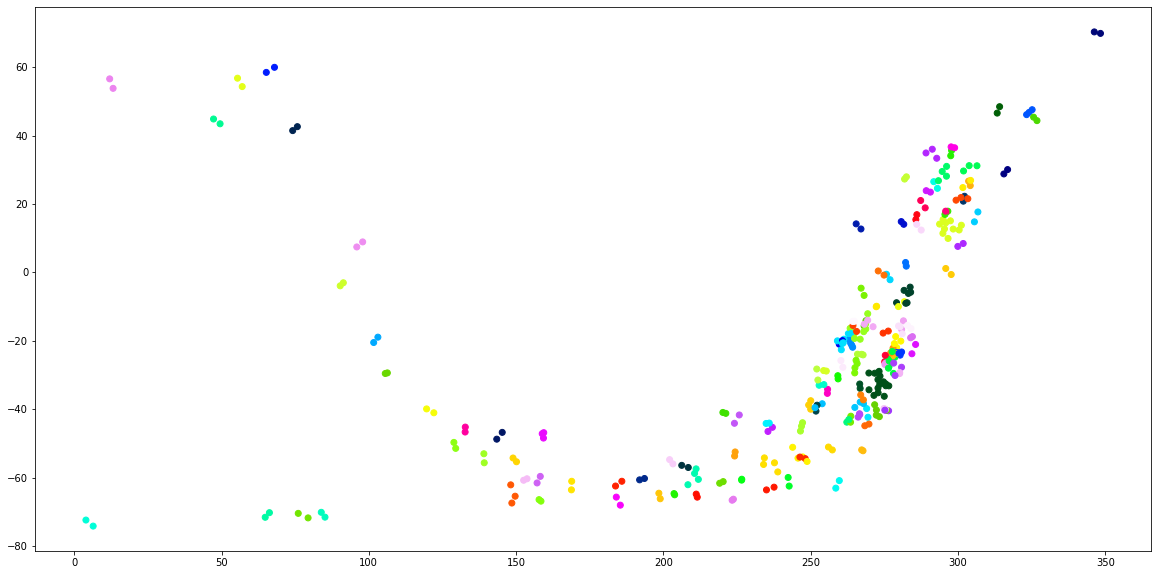

In [121]:
plt.figure(figsize=(20, 10))
plt.scatter(clustered_sources['ra'], clustered_sources['dec'], c=clustered_sources['label'], cmap='gist_ncar');

In [74]:
sources_astrometry[sources_astrometry['label']==18].head()

,ra,dec,parallax,pmra,pmdec,label
41,78.048145,-62.778962,0.140733,1.810797,-0.152277,18
